In [10]:
from fbprophet import Prophet
import pandas as pd
import datetime as dt

data1 = pd.read_csv('district_heat_date2.txt', header=None)
data1.columns = ['ds']
data2 = pd.read_csv('district_heat2.txt', header=None)
data2.columns = ['y']

df1 = pd.DataFrame({'ds':data1['ds']})
df2 = pd.DataFrame({'y':data2['y']})

data = pd.concat([df1, df2], axis = 1)
print(data)

                        ds      y
0     06-Jul-1989 17:00:00  47.26
1     06-Jul-1989 18:00:00  46.77
2     06-Jul-1989 19:00:00  49.70
3     06-Jul-1989 20:00:00  52.06
4     06-Jul-1989 21:00:00  50.88
...                    ...    ...
1337  31-Aug-1989 10:00:00  75.87
1338  31-Aug-1989 11:00:00  75.03
1339  31-Aug-1989 12:00:00  74.44
1340  31-Aug-1989 13:00:00  73.36
1341  31-Aug-1989 14:00:00  70.88

[1342 rows x 2 columns]


In [11]:
m = Prophet()
m.fit(data)
future = m.make_future_dataframe(periods=168, freq='H')
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


,ds
1504,1989-09-07 10:00:00
1505,1989-09-07 11:00:00
1506,1989-09-07 12:00:00
1507,1989-09-07 13:00:00
1508,1989-09-07 14:00:00


                      ds       yhat  yhat_lower  yhat_upper
0    1989-07-06 17:00:00  44.964474   41.269644   48.763727
1    1989-07-06 18:00:00  46.212698   42.582768   50.199464
2    1989-07-06 19:00:00  47.458635   43.452865   51.383937
3    1989-07-06 20:00:00  47.878106   43.938095   51.782486
4    1989-07-06 21:00:00  47.178474   43.243474   51.124937
...                  ...        ...         ...         ...
1504 1989-09-07 10:00:00  83.636552   75.359630   92.079203
1505 1989-09-07 11:00:00  83.709821   75.045222   92.491031
1506 1989-09-07 12:00:00  83.436713   74.509402   92.147636
1507 1989-09-07 13:00:00  82.869978   74.575489   91.544629
1508 1989-09-07 14:00:00  82.010268   73.295200   91.147023

[1509 rows x 4 columns]


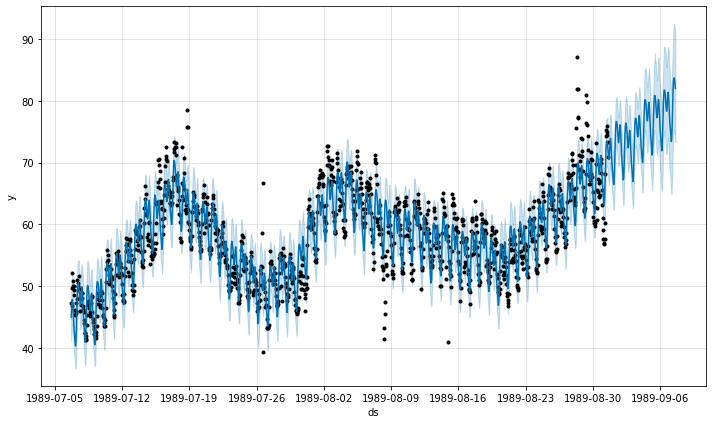

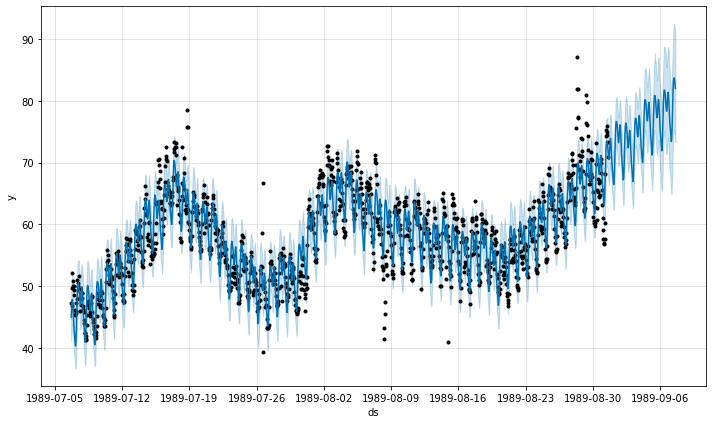

In [12]:
fcst = m.predict(future)
print(fcst[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
m.plot(fcst)

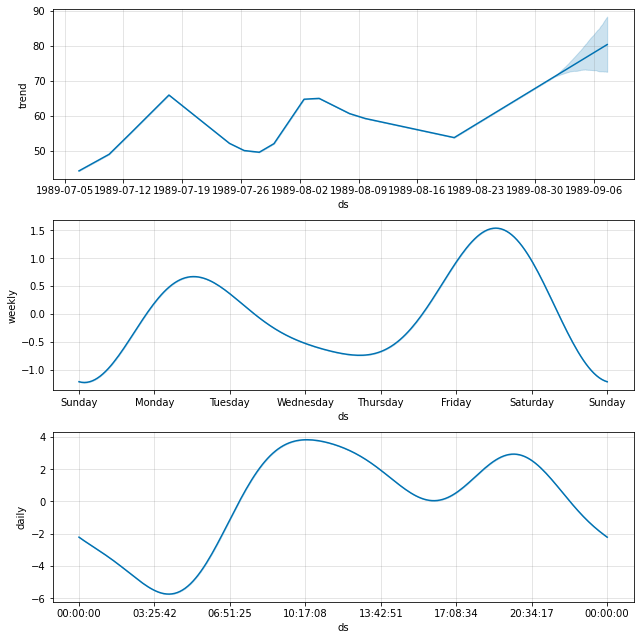

In [13]:
fig2 = m.plot_components(fcst)

In [14]:
yhat = fcst.loc[:,['yhat']].tail(168)

In [15]:
print(yhat)
type(yhat)

           yhat
1341  70.899413
1342  70.506123
1343  71.017279
1344  72.271264
1345  73.522961
...         ...
1504  83.636552
1505  83.709821
1506  83.436713
1507  82.869978
1508  82.010268

[168 rows x 1 columns]


pandas.core.frame.DataFrame

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


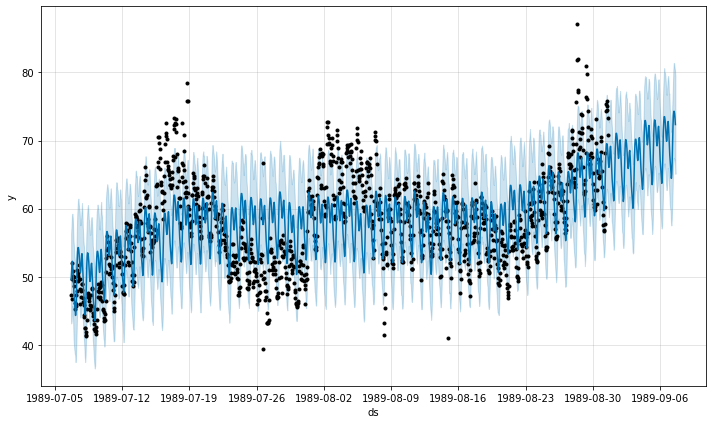

In [16]:
m = Prophet(changepoint_prior_scale=0.01).fit(data)
future = m.make_future_dataframe(periods=168, freq='H')
fcst = m.predict(future)
fig = m.plot(fcst)

In [17]:
yhat.to_csv('yhat2.csv')

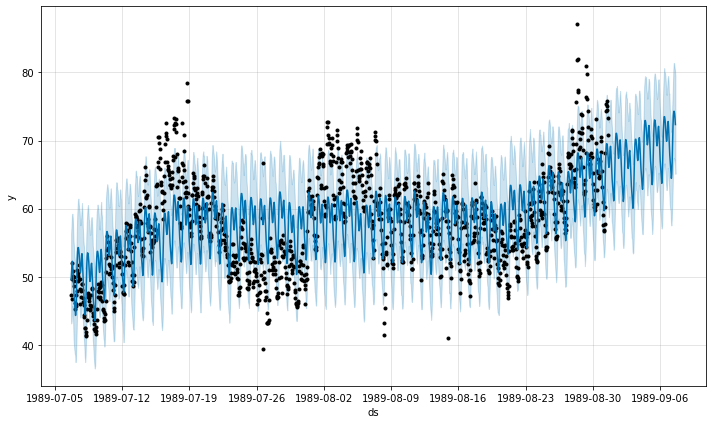

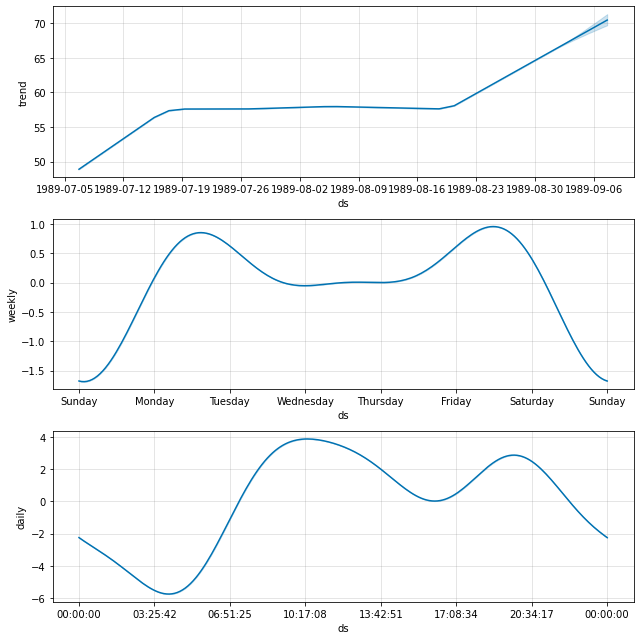

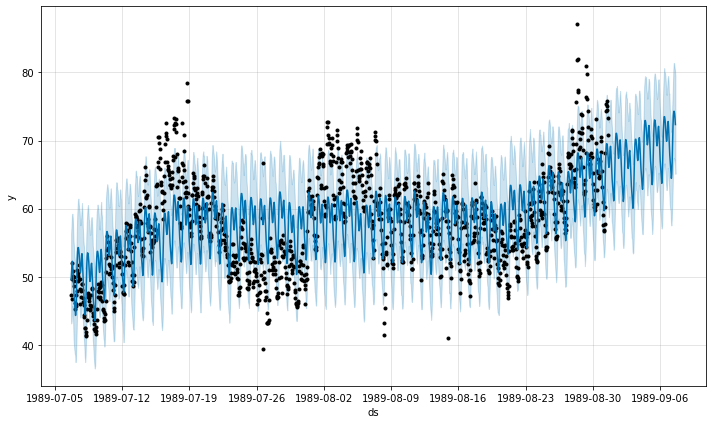

In [18]:
fig2 = m.plot_components(fcst)
m.plot(fcst)